In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import time
import os
import datetime
from datetime import date
import sklearn
from sklearn.preprocessing import Imputer
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

In [176]:
listings = pd.read_csv("C:/Users/internfkara/Documents/PythonScripts/datasets/boston airbnb/listings.csv")

In [177]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high ceilings. Deck, garden with hens, beehives & play structure. Short walk to charming village with attractive stores, groceries & local restaurants....","The house has an open and cozy feel at the same time. The living room has a flat screen TV. The kitchen has all you need for cooking. We prefer you buy your food but can use the organic oils, h...","Cozy, sunny, family home. Master bedroom high ceilings. Deck, garden with hens, beehives & play structure. Short walk to charming village with attractive stores, groceries & local restaurants....",none,"Roslindale is quiet, convenient and friendly. For Southern food try Redd's in Rozzie. Italian Delfino's or Sophia's Grotto are great. Birch St Bistro has nice atmostphere--a little pricier. If...",NaN,"The bus stop is 2 blocks away, and frequent. Bus is about a 10 minute ride to the Orange line, forest hills. The commuter rail into down town is a 6 minute walk from our home. Walking is pleasant...","You will have access to 2 bedrooms, a living room, kitchen, bathrooms, and yard.",NaN,Clean up and treat the home the way you'd like your home to be treated. No smoking.,https://a2.muscache.com/im/pictures/c0842db1-ee98-4fe8-870b-d1e2af33855d.jpg?aki_policy=small,https://a2.muscache.com/im/pictures/c0842db1-ee98-4fe8-870b-d1e2af33855d.jpg?aki_policy=medium,https://a2.muscache.com/im/pictures/c0842db1-ee98-4fe8-870b-d1e2af33855d.jpg?aki_policy=large,https://a2.muscache.com/im/pictures/c0842db1-ee98-4fe8-870b-d1e2af33855d.jpg?aki_policy=x_large,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States","We are country and city connecting in our deck and garden. Enjoy our music room, books and flat screen TV with the pastoral backyard of hens, bees, rabbits and an organic garden.",NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-ba16-45bd-ac33-9226137d0763.jpg?aki_policy=profile_small,https://a2.muscache.com/im/pictures/5936fef0-ba16-45bd-ac33-9226137d0763.jpg?aki_policy=profile_x_medium,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking on Premises"",""Pets live on this property"",Dog(s),Heating,""Family/Kid Friendly"",Washer,Dryer,""Smoke 

In [178]:
print(listings.shape)

(3585, 95)


In [179]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
id                                  3585 non-null int64
listing_url                         3585 non-null object
scrape_id                           3585 non-null int64
last_scraped                        3585 non-null object
name                                3585 non-null object
summary                             3442 non-null object
space                               2528 non-null object
description                         3585 non-null object
experiences_offered                 3585 non-null object
neighborhood_overview               2170 non-null object
notes                               1610 non-null object
transit                             2295 non-null object
access                              2096 non-null object
interaction                         2031 non-null object
house_rules                         2393 non-null object
thumbnail_url                       2986

In [180]:
copy_listings = listings.copy() #we will work on the copy of the dataset

In [181]:
# changing Price's type from object to float.
copy_listings.price = copy_listings.price.str.replace('$', '').str.replace(',', '').astype(float)

In [182]:
copy_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
id                                  3585 non-null int64
listing_url                         3585 non-null object
scrape_id                           3585 non-null int64
last_scraped                        3585 non-null object
name                                3585 non-null object
summary                             3442 non-null object
space                               2528 non-null object
description                         3585 non-null object
experiences_offered                 3585 non-null object
neighborhood_overview               2170 non-null object
notes                               1610 non-null object
transit                             2295 non-null object
access                              2096 non-null object
interaction                         2031 non-null object
house_rules                         2393 non-null object
thumbnail_url                       2986

In [183]:
copy_listings.drop_duplicates(keep=False,inplace=True)

In [184]:
# Select important columns
column = ["id", "price", "summary", "host_response_time", "host_response_rate", "property_type", "accommodates", "bathrooms", "bedrooms","beds", "review_scores_value", "review_scores_accuracy", "review_scores_rating", "review_scores_cleanliness", "review_scores_communication", "review_scores_location" ,"square_feet"]
listing_dataset = copy_listings[column]
listing_dataset.head()

,id,price,summary,host_response_time,host_response_rate,property_type,accommodates,bathrooms,bedrooms,beds,review_scores_value,review_scores_accuracy,review_scores_rating,review_scores_cleanliness,review_scores_communication,review_scores_location,square_feet
0,12147973,250.0,"Cozy, sunny, family home. Master bedroom high ceilings. Deck, garden with hens, beehives & play structure. Short walk to charming village with attractive stores, groceries & local restaurants....",NaN,NaN,House,4,1.5,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3075044,65.0,"Charming and quiet room in a second floor 1910 condo building. The room has a full size bed, darkening curtains, window A/C unit. It's quiet because it's in the back of the house. Shared bathroom....",within an hour,100%,Apartment,2,1.0,1.0,1.0,9.0,10.0,94.0,9.0,10.0,9.0,NaN
2,6976,65.0,"Come stay with a friendly, middle-aged guy in the safe and quiet Roslindale neighborhood of Boston. You will have you own clean, furnished room (with cable TV, Wi-Fi, and a desk to work at) in an ...",within a few hours,100%,Apartment,2,1.0,1.0,1.0,10.0,10.0,98.0,9.0,10.0,9.0,NaN
3,1436513,75.0,"Come experience the comforts of home away from home in our fabulous bedroom suite available in Roslindale, a neighborhood in Boston. Enjoy sleeping on a large king sized bed with plush down beddi...",within a few hours,100%,House,4,1.0,1.0,2.0,10.0,10.0,100.0,10.0,10.0,10.0,NaN
4,7651065,79.0,"My comfy, clean and relaxing home is one block away from the bus line, on a quiet residential street. Private room includes two comfortable single beds. Full bath and half bath may be shared wit...",within an hour,100%,House,2,1.5,1.0,2.0,10.0,10.0,99.0,10.0,10.0,9.0,NaN


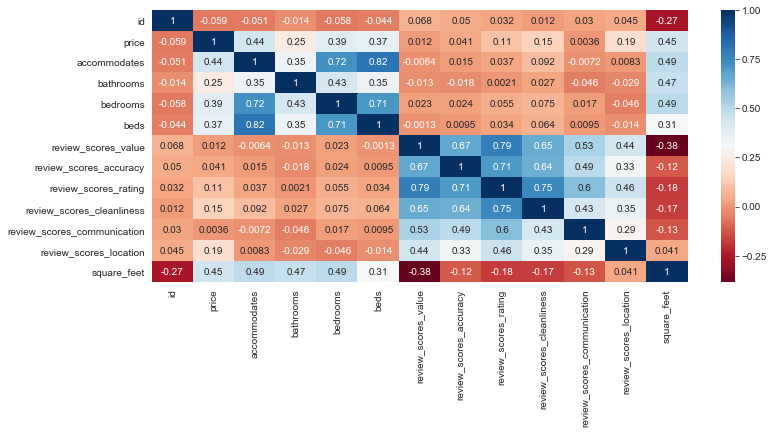

In [185]:
# Correlation with prices
plt.figure(figsize=(12,5))
sns.heatmap(listing_dataset.corr(), cmap='RdBu', annot=True)
plt.show()

In [186]:
#Ensure the corelation columns in price (compating first copy dataset with all columns)
correlation = copy_listings.corr()['price'].sort_values(ascending = False).head(10)[1:]
correlation

square_feet               0.447795
accommodates              0.437756
bedrooms                  0.385298
beds                      0.370013
bathrooms                 0.248234
guests_included           0.211806
latitude                  0.196270
review_scores_location    0.193928
host_listings_count       0.171930
Name: price, dtype: float64

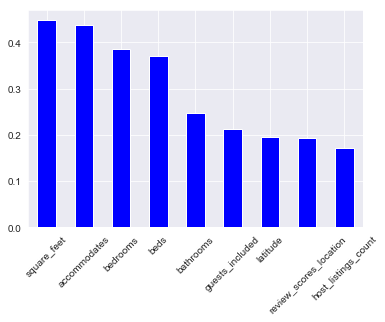

In [187]:
correlation.plot(kind = 'bar', color = 'b');
plt.xticks(rotation=45);

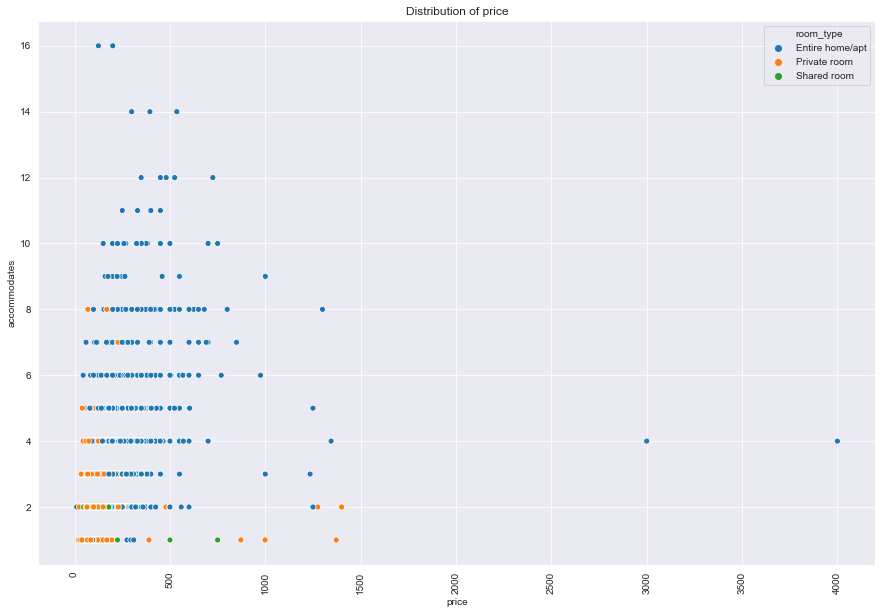

In [188]:
#Distribution of price comparing Accomodation with room type.
plt.figure(figsize=(15, 10));
sns.scatterplot(x='price', y='accommodates', hue='room_type', data=copy_listings);
plt.xticks(rotation='vertical');
plt.title('Distribution of price')
plt.savefig('dist_price.jpg')

In [189]:
# trying to see relation between accomodation and room type above the price.
sample = copy_listings[(copy_listings.accommodates == 2) & (copy_listings.room_type == 'Private room')]

In [190]:
# describing the price.
sample.price.describe()

count     855.000000
mean      100.038596
std        79.626262
min        10.000000
25%        67.000000
50%        85.000000
75%       110.000000
max      1400.000000
Name: price, dtype: float64

In [191]:
# Checking the standart deviation for each city (how many prices they have)
sample.city.value_counts()

Boston                    778
Somerville                 11
Allston                    10
Roxbury Crossing            9
Brighton                    8
Jamaica Plain               7
Brookline                   7
Roslindale                  4
Cambridge                   3
East Boston                 2
ROXBURY CROSSING            2
Mattapan                    2
Dorchester                  2
Jamaica Plain               2
Hyde Park                   1
Boston                      1
Charlestown                 1
Jamaica Plain, MA           1
Brighton                    1
波士顿                         1
Boston (Jamaica Plain)      1
east Boston                 1
Name: city, dtype: int64

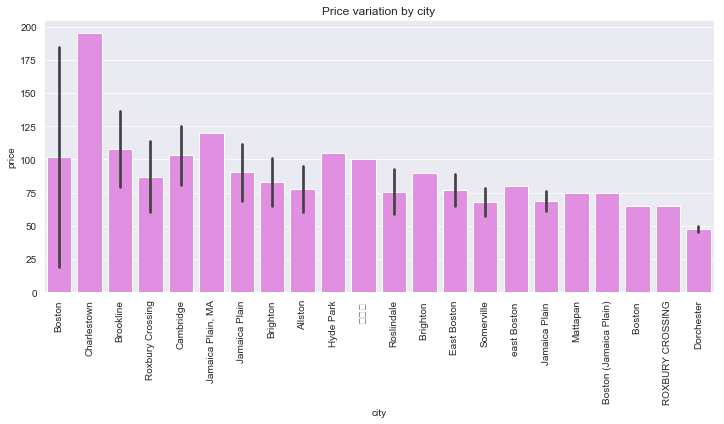

In [192]:
# Standart deviation and Price rates
plt.figure(figsize=(12,5));
sns.barplot(x='city', y='price', data=sample[['city', 'price']].sort_values(by='price', ascending=False), ci="sd", color='violet');
plt.xticks(rotation='vertical');
plt.title('Price variation by city');
plt.savefig('pricesforcities.jpg')

As we can see that standard deviation is different in each city and Boston has biggest standard deviation.
In comparison, Cambridge has the highest average price.

In [193]:
%matplotlib inline
#Getting ready for prediction
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression

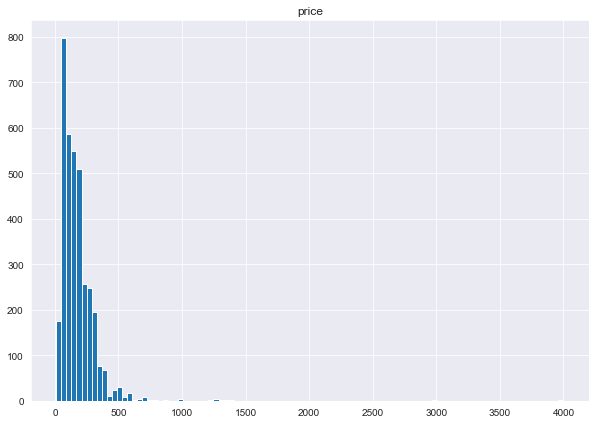

In [194]:
# Plot the histogram of Price
listing_dataset.hist(column = "price", bins = 100, figsize = (10, 7) )
plt.show()

In [195]:
print("Dataset's mean score is : " , listing_dataset.price.mean())
print("Dataset's median score is : " ,listing_dataset.price.median())

Dataset's mean score is :  173.9258019525802
Dataset's median score is :  150.0


In [196]:
#as we can see mean and median on price has huge difference.!

In [197]:
# Drop the outliers where prices are much higher than the median
price_qua  = listing_dataset["price"].quantile(0.999)
listing_dataset2 = listing_dataset[listing_dataset["price"] < price_qua]

In [198]:
# Drop null values of listings_dropped
listing_dataset2 = listing_dataset2.reset_index()
listings_dropped = listing_dataset2.dropna(axis = 0)

# The following features are the ones having high correlation with price
X = listings_dropped[["accommodates", "bathrooms", "bedrooms", "beds", "review_scores_location","review_scores_cleanliness"]]
y = listings_dropped["price"]

# split test and train dataset from X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=45)

# Create instance of Random Forest Regressor and evaluate model
_model_rf = RandomForestRegressor(n_estimators=76, random_state=47)
_model_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=76, n_jobs=None,
           oob_score=False, random_state=47, verbose=0, warm_start=False)

In [199]:
# Predict using the model
y_test_predict = _model_rf.predict(X_test)

# Score using the model
r2_test = r2_score(y_test, y_test_predict)
length_y_test = len(y_test)
print("The r-squared score for your model was {} on {} values.".format(r2_test, length_y_test))

The r-squared score for your model was 0.3351947946823851 on 12 values.


No handles with labels found to put in legend.


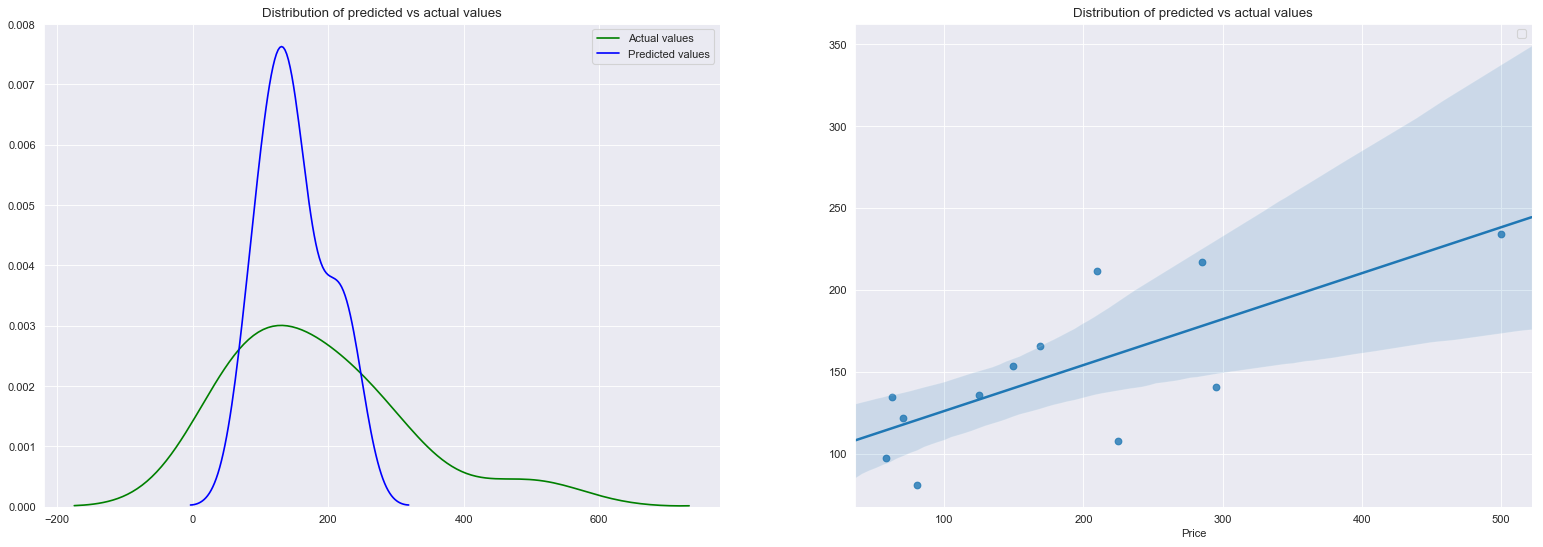

In [200]:
fig, axs = plt.subplots(1, 2, figsize=(24, 8), dpi=80)
axs[0].set_title('Distribution of predicted vs actual values')
ax1 = sns.kdeplot(data=y_test, color="g", label='Actual values', ax=axs[0])
ax2 = sns.kdeplot(data=y_test_predict, color="b", label='Predicted values', ax=ax1)
    
sns.regplot(x=y_test, y=y_test_predict)
plt.title('Distribution of predicted vs actual values')
plt.xlabel('Price')
plt.legend()
plt.show()
plt.close()

In [201]:
#Seems like I need to keep working on the model :/

In [202]:
calendar = pd.read_csv("C:/Users/internfkara/Documents/PythonScripts/datasets/boston airbnb/calendar.csv")

In [203]:
calendar.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [204]:
calendar.tail()

,listing_id,date,available,price
1308885,14504422,2016-09-10,f,NaN
1308886,14504422,2016-09-09,f,NaN
1308887,14504422,2016-09-08,f,NaN
1308888,14504422,2016-09-07,f,NaN
1308889,14504422,2016-09-06,f,NaN


In [205]:
#seems like price has a lot of missing NaN values

In [206]:
calendar.isnull().mean()

listing_id    0.000000
date          0.000000
available     0.000000
price         0.508716
dtype: float64

In [207]:
#Almost half of the price is missing here in calendar dataset. So we will analyse the other columns.

In [208]:
#Available column has true and false values.
calendar.available.value_counts()

f    665853
t    643037
Name: available, dtype: int64

In [209]:
#Converting date from string to datetime object
calendar["date"] = pd.to_datetime(calendar["date"])
calendar.date.describe()

count                 1308890
unique                    365
top       2016-12-27 00:00:00
freq                     3586
first     2016-09-06 00:00:00
last      2017-09-05 00:00:00
Name: date, dtype: object

In [210]:
#Converting 'f' values to 0 (not available), and 't' values to 1 (available) 
calendar["available"]=calendar["available"].apply(lambda x:1 if x=="t" else 0)
calendar.available.value_counts()

0    665853
1    643037
Name: available, dtype: int64

In [219]:
#Availability percentage and counts per day
calendarDaily = calendar.groupby("date")["available"].agg(["sum","mean"]).reset_index()
calendarDaily.rename(columns={"sum":"Available Count","mean":"Availability"},inplace=True)                                         
calendarDaily.head()

,date,Available Count,Availability
0,2016-09-06,570,0.158951
1,2016-09-07,932,0.259900
2,2016-09-08,999,0.278583
3,2016-09-09,981,0.273564
4,2016-09-10,956,0.266592


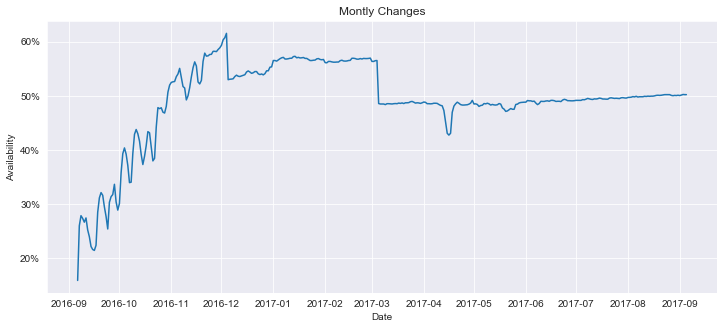

In [220]:
#Checking trend of availability monthly
sns.set_style("darkgrid")
plt.figure(figsize=(12,5))

month=sns.lineplot(x=calendarDaily.date,y=calendarDaily.Availability)
month.set(xlabel="Date",ylabel="Availability", title="Montly Changes")

y_tickvalue=['{:,.0f}'.format(x*100) + '%' for x in month.get_yticks()]
month.set_yticklabels(y_tickvalue)

months = mdates.MonthLocator()
month.xaxis.set_major_locator(months)

plt.savefig("availability_trend.png")

In [221]:
#Let's have a look for weekly changes 
calendar["day_of_week"] = calendar["date"].dt.dayofweek
calendarWeekly = calendar.groupby("day_of_week")["available"].agg(["sum","mean"]).reset_index()
calendarWeekly.rename(columns={"sum":"available_count","mean":"availability"},inplace=True)
calendarWeekly

,day_of_week,available_count,availability
0,0,92413,0.495586
1,1,93332,0.491071
2,2,91816,0.492385
3,3,91202,0.489092
4,4,90998,0.487998
5,5,91068,0.488374
6,6,92208,0.494487


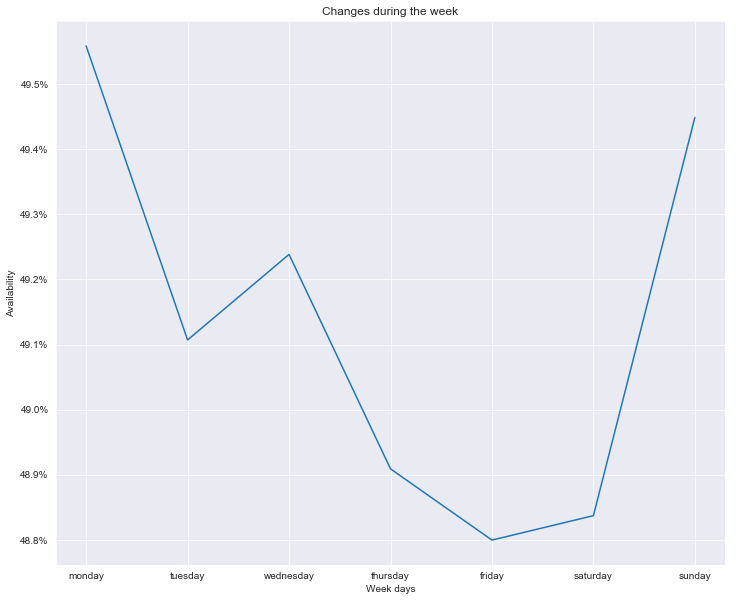

In [218]:
plt.figure(figsize=(12,10))
sns.set_style("darkgrid")
week=sns.lineplot(x=calendarWeekly.day_of_week,y=calendarWeekly.availability)
week.set(xlabel="Week days",ylabel="Availability", title="Changes during the week")
week.set_xticks([0,1,2,3,4,5,6])
week.set_xticklabels(["monday","tuesday","wednesday","thursday","friday","saturday","sunday"])

y_tickvalue=['{:,.1f}'.format(x*100) + '%' for x in ax.get_yticks()]
week.set_yticklabels(y_tickvalue)
plt.savefig("availability_weekly.png")